# Porazdelitvena funkcija normalne slučajne spremenljivke

Napišite učinkovito funkcijo, ki izračuna vrednosti porazdelitvene funkcije za standardno normalno porazdeljeno slučajno spremenljivko $X \sim N(0,1)$. Porazdelitvena funkcija je definirana kot:

$$
\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt
$$

Ker gre v zgornjem primeru za določen integral ne neomejenem intervalu $(-\infty, x]$, ga moramo za uporabo numeričnih metod najprej omejiti, ali pa preoblikovati v integral na končnem intervalu. V primeru porazdelitvene funkcije normalne slučajne spremenljivke že obstaja povezava s funkcijo napake (error function), ki je definirana kot:
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt
$$

Povezava med porazdelitveno funkcijo in funkcijo napake je naslednja:
$$
\Phi(x) = \frac{1}{2} \left(1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)
$$

V svoji implementaciji bom uporabil Rombergovo metodo za računanje integralov. Rombergova metoda računa vrednost integrala oblike $\int_a^b f(x) dx$ po naslednjem algoritmu:
$$
h_n = \frac{b-a}{2^n} \qquad R(0,0) = h_1 (f(a) + f(b))
$$

$$
R(n, 0) = \frac{1}{2} R(n-1, 0) + h_n \sum_{k=1}^{2^{n-1}} f(a + (2k-1)h_n)
$$

$$
R(n,m) = R(n, m-1) + \frac{1}{4^{m}-1} (R (n, m-1) - R(n-1, m-1)) \\
$$

Red napake Rombergove metode za $R(n,m)$ je enak $O(h_n^{2m+2})$. 

In [49]:
# Dodajanje implementacije v Jupyter notebook
include("../src/main.jl");

In [50]:
# Testiranje implementacije izracuna porazdelitvene funkcije normalne slucajne spremenljivke
include("../tests/runtests_part1.jl");

Test Summary:                                            | Pass  Total  Time
Testiranje porazdelitvene funkcije normalne porazdelitve |  104    104  0.0s
  s tabeliranimi vrednostmi                              |    4      4  0.0s
  z uporabo paketa Distributions.jl                      |  100    100  0.0s


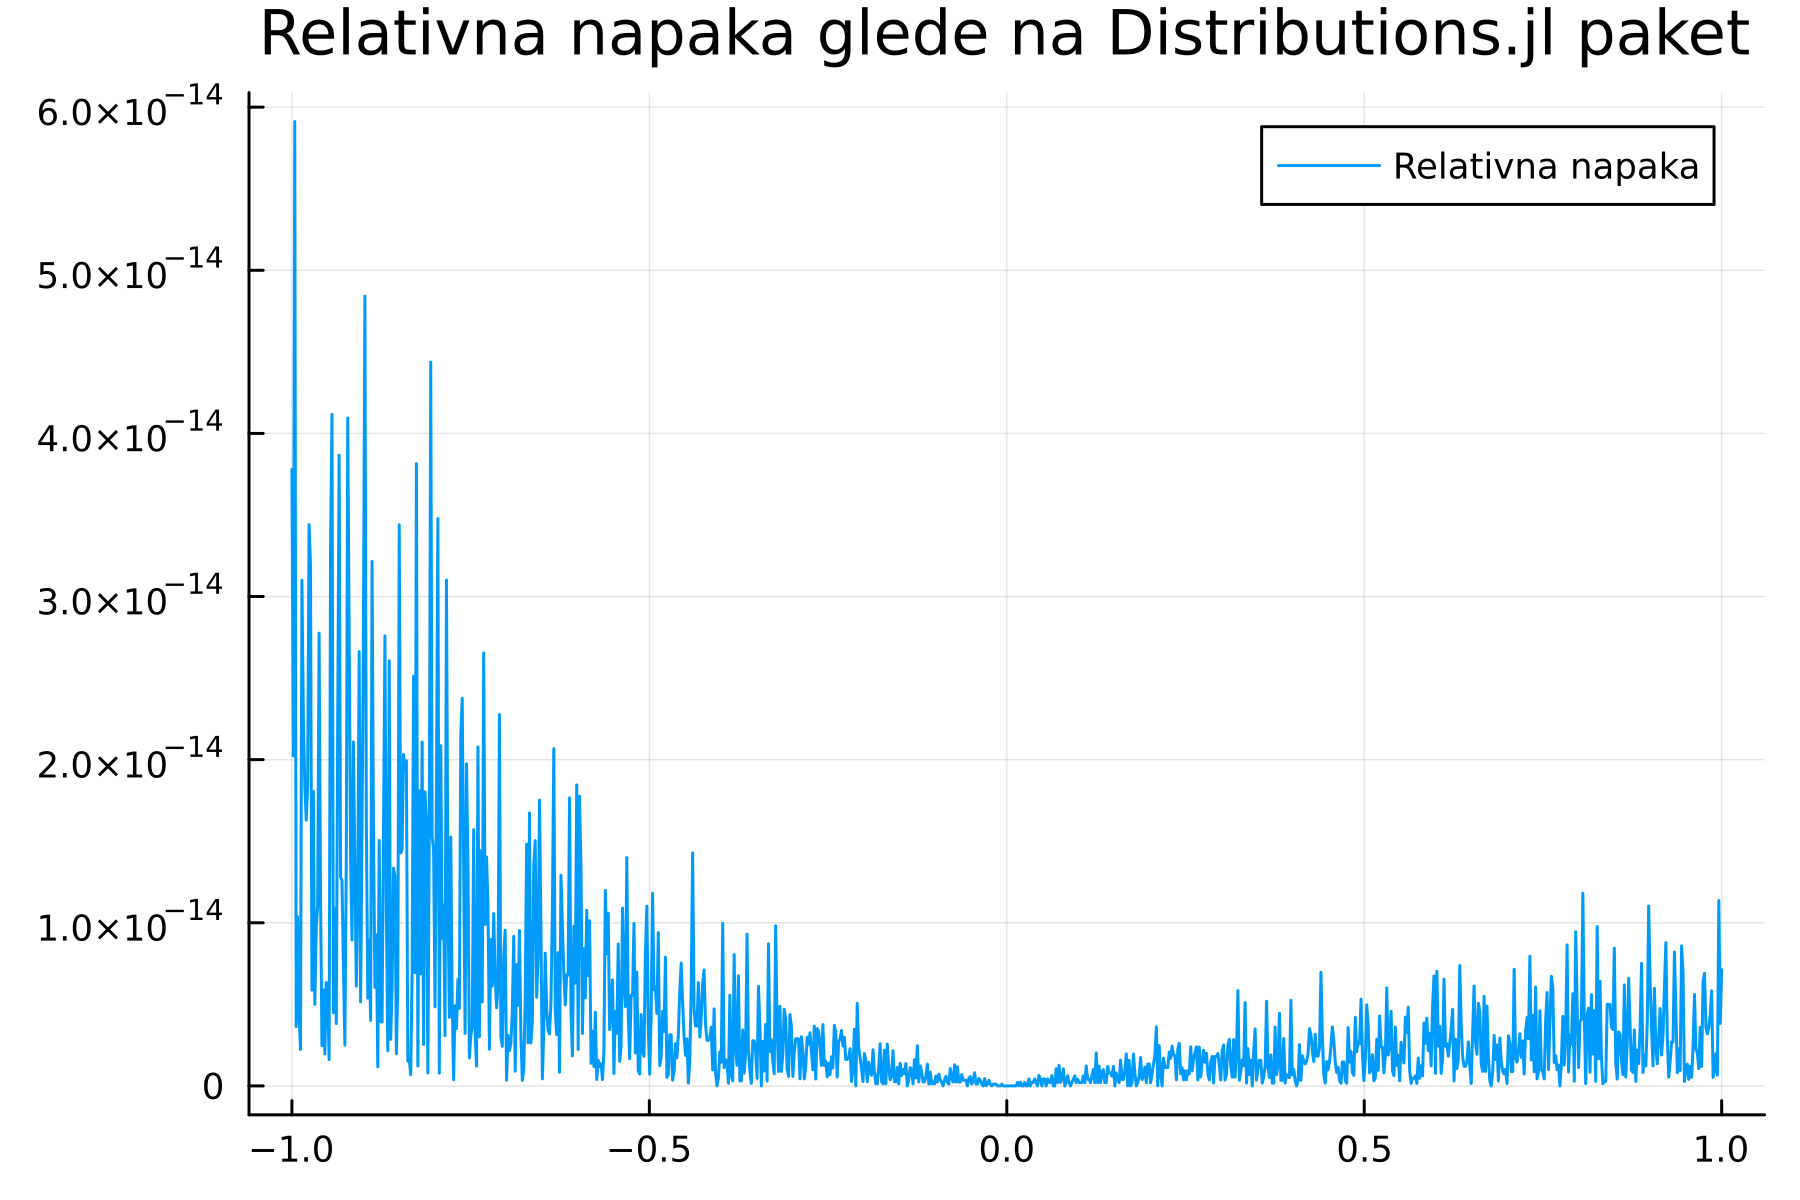

In [51]:
using Plots, Distributions

x_arr = range(-1.0, 1.0, length=1000)
y_arr = gaussian_cdf.(x_arr, 20, 1e-20, true)
acc_y = cdf.(Normal(), x_arr)
rel_diff = [abs(y_arr[i] - acc_y[i]) / abs(acc_y[i]) for i in 1:length(x_arr)]
plot(x_arr, rel_diff, title="Relativna napaka glede na Distributions.jl paket", legend=:topright, label="Relativna napaka", dpi=300)

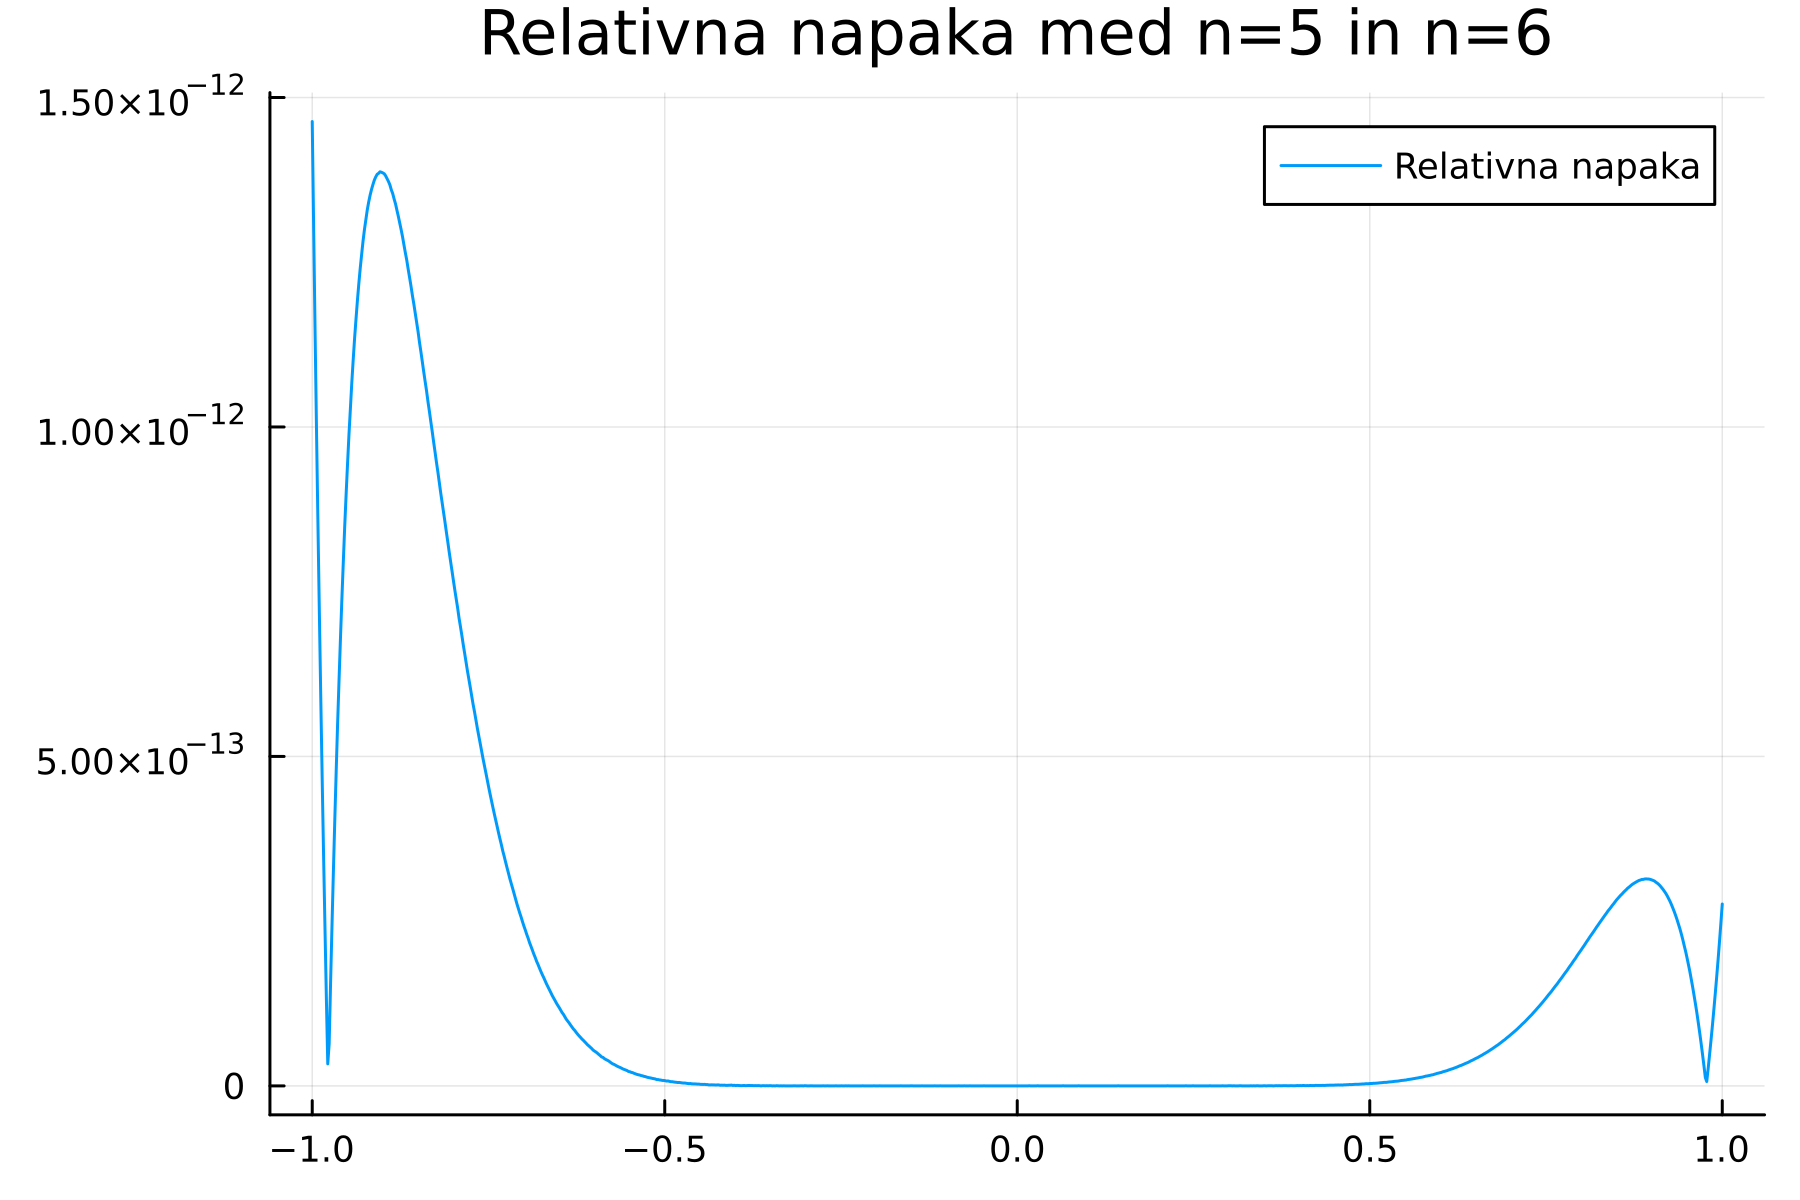

In [52]:
x_arr = range(-1, 1, length=1000)

# Izris grafa relativne napake z uporabo različnega števila korakov
y_arr_low = gaussian_cdf.(x_arr, 5, 1e-10, true)
y_arr_high = gaussian_cdf.(x_arr, 6, 1e-10, true)
rel_dif = [abs(y_arr_low[i] - y_arr_high[i]) / abs(y_arr_high[i]) for i in 1:length(x_arr)]
plot(x_arr, rel_dif, title="Relativna napaka med n=5 in n=6", legend=:topright, label="Relativna napaka", dpi=300)

# Ploščina Hipotrohoide

Izračunajmo ploščino območja, ki ga omejuje hipotrohoida podana parametrično z enačbama:
$$
x(t) = (a+b)cos(t) + bcos(\frac{a+b}{b}t) \\
y(t) = (a+b)sin(t) + bsin(\frac{a+b}{b}t) \\
a = 1, b = -\frac{11}{7}
$$

Izhajali bomo iz formule za ploščino krivočrtnega trikotnika pod krivuljo:
$$
P = \frac{1}{2} \int_{t_1}^{t_2} (x(t)y'(t) - x'(t)y(t)) dt
$$

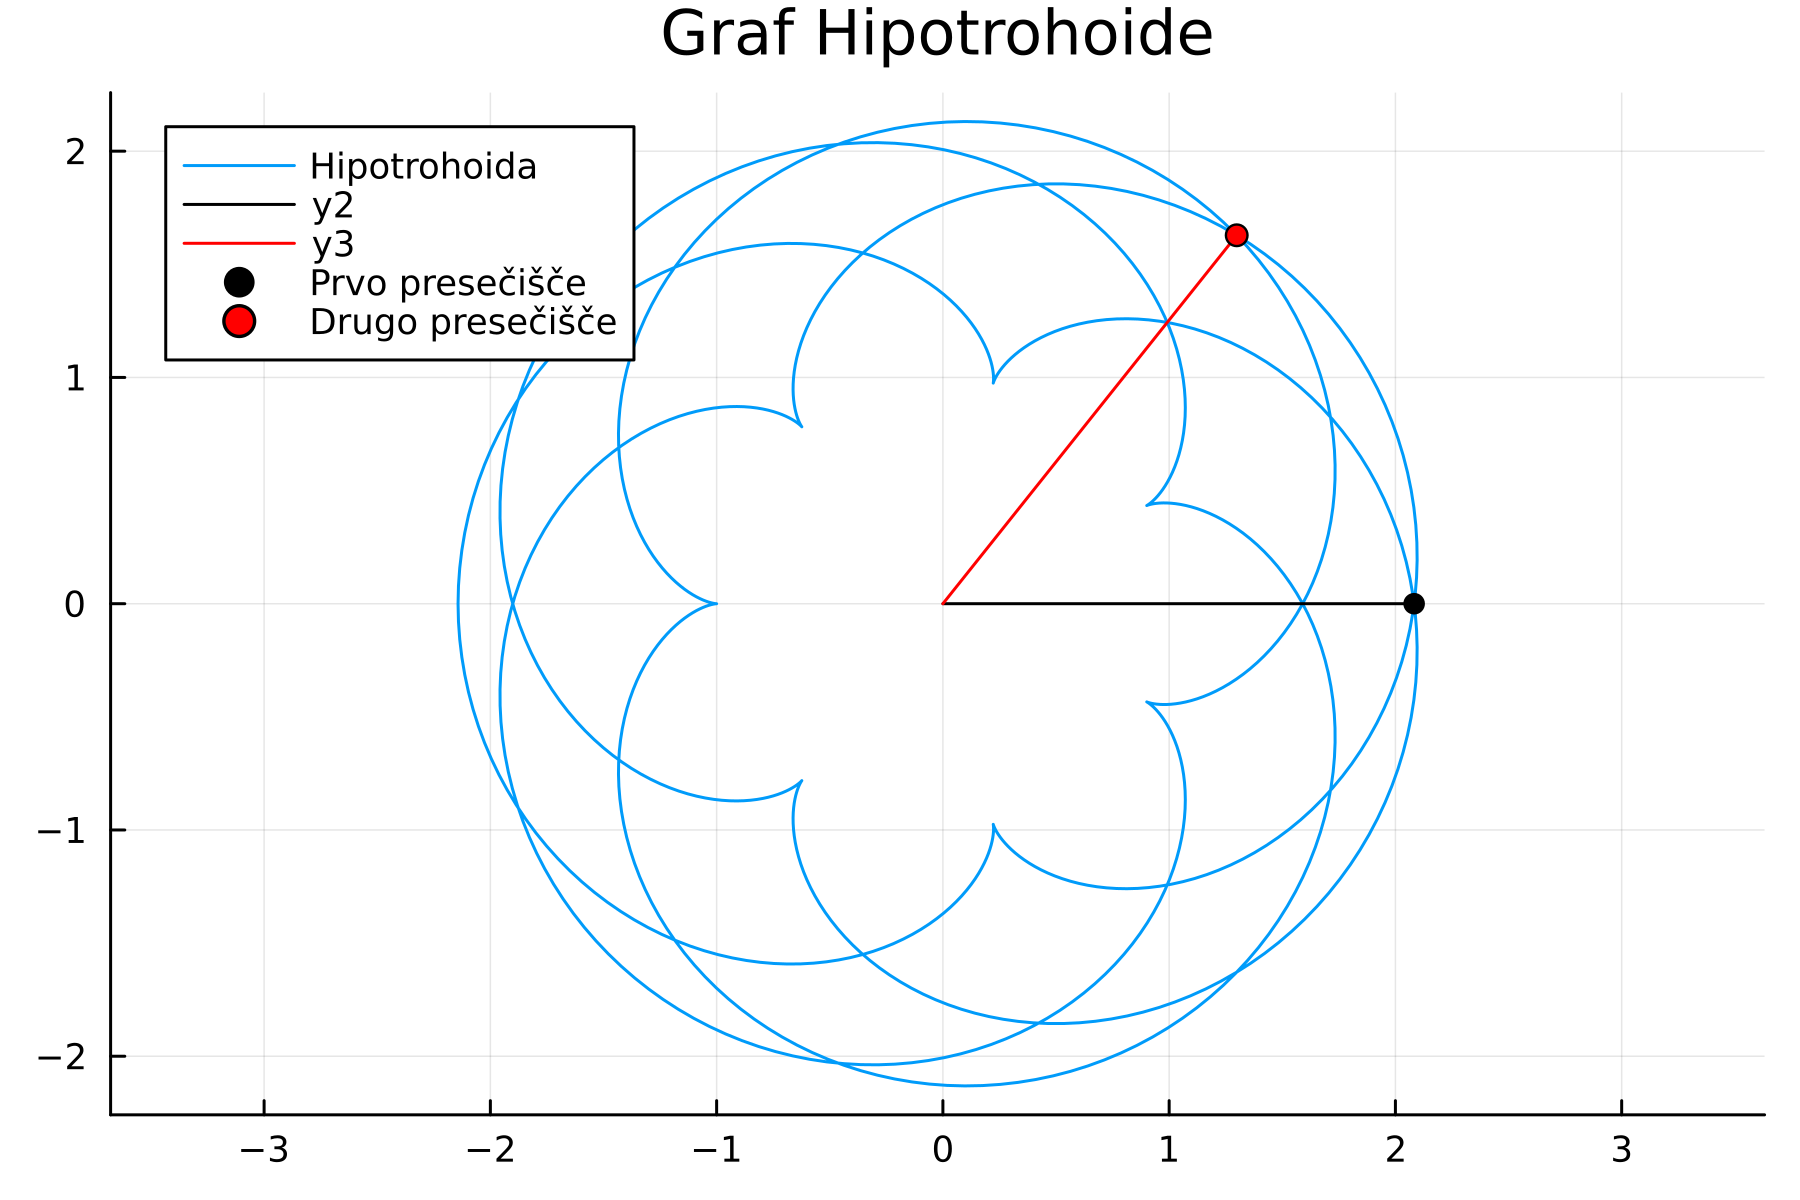

In [53]:
using Plots

a = 1.0
b = -11.0 / 7.0
ts = range(0, 22*pi , length=1000)
xs = [hypotrochoid(t, a, b)[1] for t in ts]
ys = [hypotrochoid(t, a, b)[2] for t in ts]

t0, t1 = hypotrochoid_intersect()
val1 = hypotrochoid(t0, a, b)
val2 = hypotrochoid(t1, a, b)

plot(xs, ys, aspect_ratio=:equal, legend=:topleft, title="Graf Hipotrohoide", label="Hipotrohoida", dpi=300)
plot!([0.0, val1[1]], [0.0, val1[2]], color="black")
plot!([0.0, val2[1]], [0.0, val2[2]], color="red")
scatter!([val1[1]], [val1[2]], color="black", label="Prvo presečišče")
scatter!([val2[1]], [val2[2]], color="red", label="Drugo presečišče")


In [54]:
# Izračunamo površino 
hypotrochoid_area(15, 1e-10, true)

14.158197590966063

## Obrazložitev pravilnosti rešitve

Čeprav ne moremo analitično pokazati, da gre za pravilno rešitev, lahko pravilnost slednje primerjamo
z izračunanima površinama dveh krožnic, ki ju dobimo, če za njuna radija uporabimo $r_1 = |a+2b|$ in $r_2 = x(t_0)$, kjer je $t_0$ prvo samopresečišče uporabljeno v izračunu površine hipotrohoide. 

Na tak način lahko pokažemo, da more biti pravilni rezultat površine hipotrohoide ravno med površinama krožnic manjšega in večjega radija.


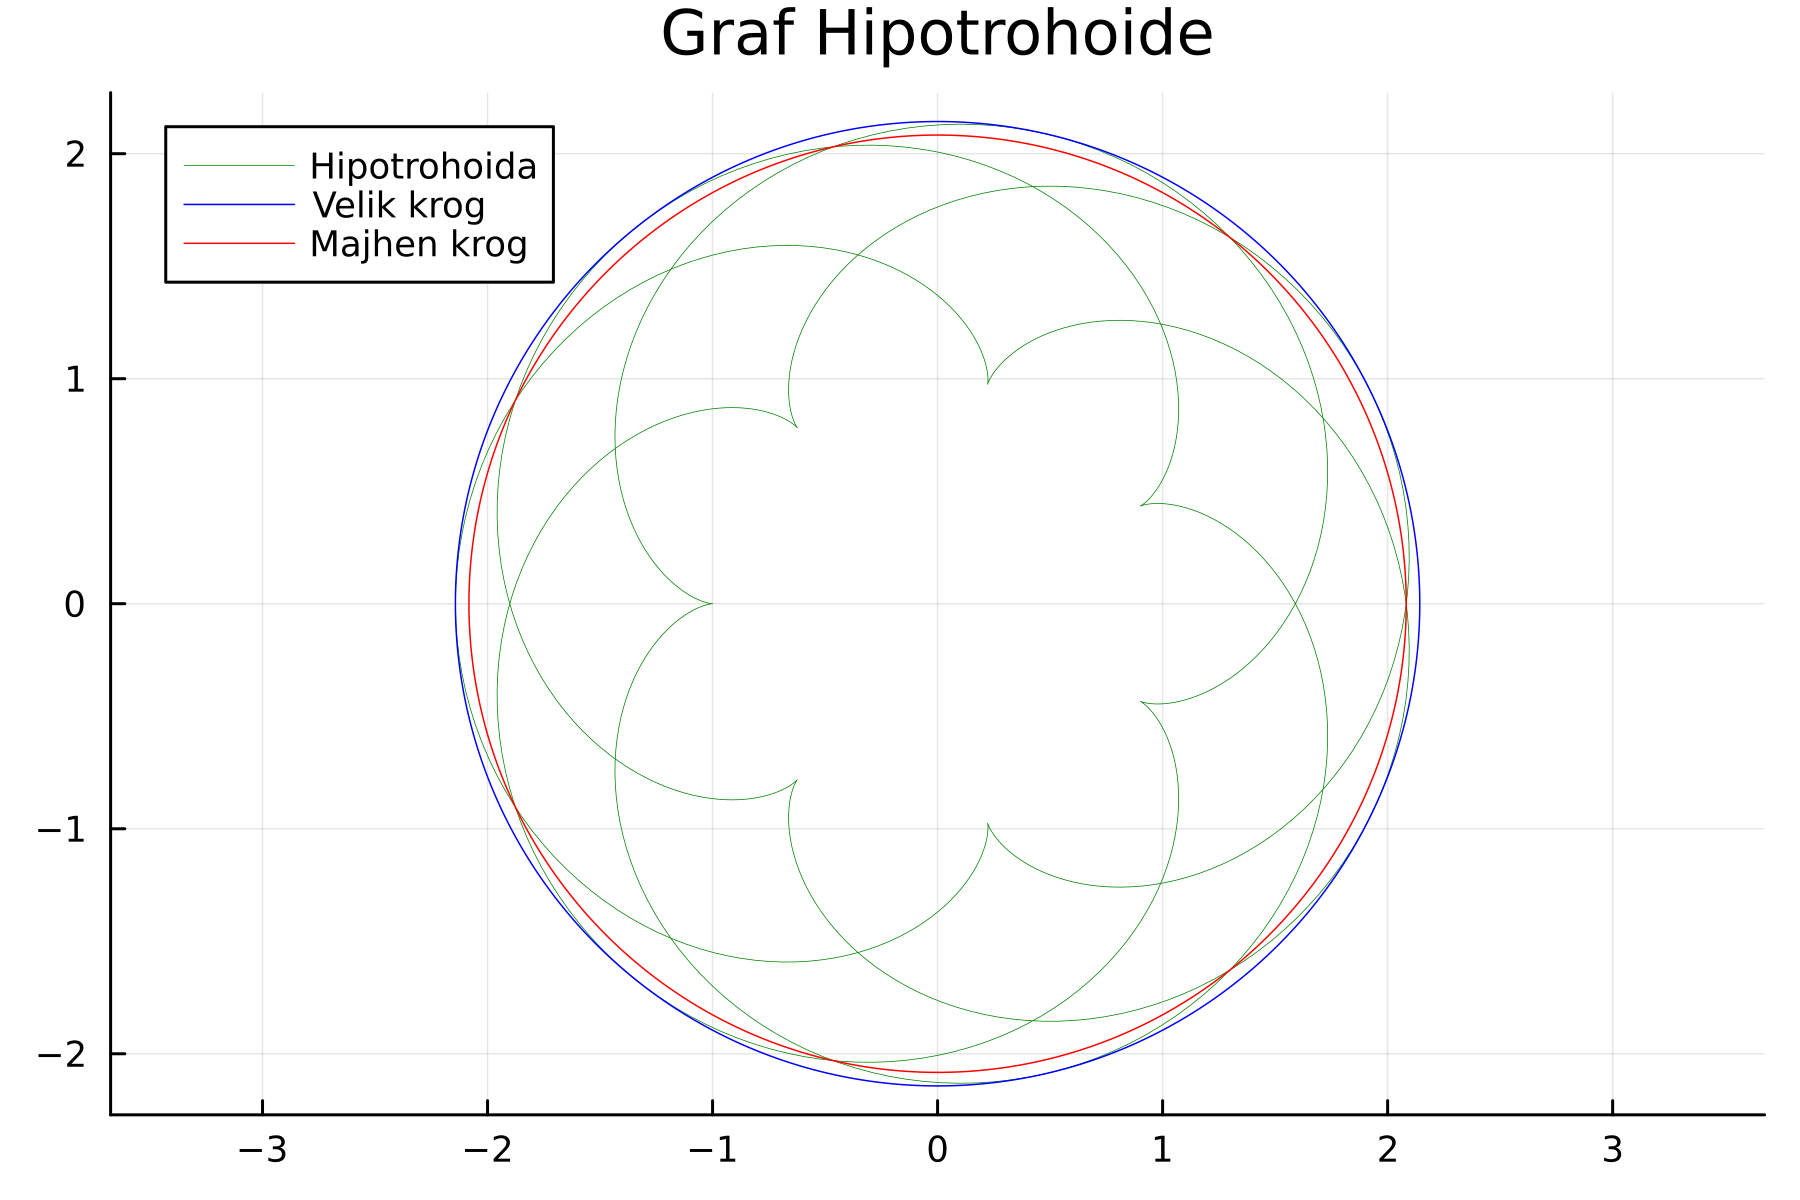

In [55]:
r1 = abs(a + 2b)
r2 = hypotrochoid(t0)[1]

theta = range(0, 2*pi, length=1000)
big_circle = [(r1*cos(t), r1*sin(t)) for t in theta]
small_circle = [(r2*cos(t), r2*sin(t)) for t in theta] 
plot(xs, ys, aspect_ratio=:equal, legend=:topleft, title="Graf Hipotrohoide", label="Hipotrohoida", color="green", lw=0.25, dpi=300)
plot!(big_circle, color="blue", label="Velik krog", lw=0.5)
plot!(small_circle, color="red", label="Majhen krog", lw=0.5)

In [56]:
a = 1.0
b = -11.0 / 7.0
t0, t1 = hypotrochoid_intersect()
big_circle_area = pi * (a+2b)^2
small_circle_area = pi * hypotrochoid(t0, a, b)[1]^2
println("Ploscina velikega kroga: ", big_circle_area)
println("Ploscina malega kroga: ", small_circle_area)
println("Ploscina hipotrohoide: ", hypotrochoid_area(15, 1e-10, true))

Ploscina velikega kroga: 14.425680552198028
Ploscina malega kroga: 13.627539223055308
Ploscina hipotrohoide: 14.158197590966063
